# Initial analysis 

In this notebook, we will analyze the result_data.json in order to understand the feasability of the methods that we want to implement in our project.

In [1]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import os
import re 
import nltk 
from nltk.stem import WordNetLemmatizer
import spacy 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

ModuleNotFoundError: No module named 'spacy'

In [3]:
YEARS = np.arange(2015, 2021)
PARTS = {2015: 21, 2016: 14, 2017: 27, 2018: 28, 2019: 22, 2020: 6}  # define dataset parameters

In [4]:
full_wiki = pd.read_json("filtered.json")

In [5]:
full_wiki.head()

,date_of_birth,nationality,gender,occupation,Speaker,Quote,numOccurrences,quote_year,quote_month
0,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,This loss is a wake-up call that despite remar...,2,2015,11
1,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"She didn't see it, she hadn't heard of it, she...",1,2015,6
2,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,As a journalist and anchor who reaches million...,1,2015,4
3,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,By empowering people to talk about their gende...,6,2015,2
4,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"By investing in this dangerous programming, TL...",133,2015,1


## 1) Preprocess data for natural language processing 
To calculate initial statistics, plot distributions and make preliminary analysis from the words frequency point of view we decided to preprocess data: 
Example: "I like dogs!" 
1. Removed punctuation: "I like dogs" 
2. Normalized the case: "i like dogs" 
3. Tokenize them: ["i", "like", "dogs"]
4. Lemmatize them: ["i", "like", "dog"] 
5. Remove stopwords that don't give a lot of information: ["like", "dog"] 

In [13]:
full_str = "".join(full_wiki.Quote)  # from quotes dataframe to string 
full_str[:100]

'This loss is a wake-up call that despite remarkable progress for LGBT equality, we must never become'

In [14]:
full_str = re.sub(r'[^\w]', " " , full_str)  # remove punctuation 
full_str[:100]

'This loss is a wake up call that despite remarkable progress for LGBT equality  we must never become'

In [15]:
full_str = full_str.lower()  # normalize case 
full_str[:100]

'this loss is a wake up call that despite remarkable progress for lgbt equality  we must never become'

In [16]:
nltk.download('punkt')
tokens = nltk.tokenize.word_tokenize(full_str)  # tokenize 
tokens[:10]

[nltk_data] Downloading package punkt to /Users/arina/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['this',
 'loss',
 'is',
 'a',
 'wake',
 'up',
 'call',
 'that',
 'despite',
 'remarkable']

In [17]:
words_amount = 100  # how many the most frequent words we wan to check
count = Counter(tokens)  
words = dict(count.most_common(words_amount))

In [18]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # lemmatize 
doc = nlp(" ".join([list(words.keys())[k] for k in range(words_amount)]))
lemmas = [token.lemma_ for token in doc]
lemmas[:10]

['the', 'and', 'to', 'of', 'a', 'i', 'that', 'in', 'it', 's']

In [19]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')  # removing stopwords and damaged by symbols words
clean_words = dict([(i, idx) for idx, i in enumerate(lemmas) if ((i not in stopwords) and (len(i) >= 3))])

[nltk_data] Downloading package stopwords to /Users/arina/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Let's summarize all preprocessing for text data in a function. 

In [6]:
def preprocess_text(year, words_amount=100):
  """
  Returns $words amount$ the most frequent words of quotes for $year$
  params: year - the year of mentionning the quote
  params: words_amount - how many the most frequent words we want to check
  """
  text = "".join(full_wiki.Quote.iloc[np.where(full_wiki.quote_year == year)]) 
  full_str = re.sub(r'[^\w]', " " , text).lower()
  tokens = nltk.tokenize.word_tokenize(full_str)  # tokenize
  count = Counter(tokens)  # count words
  words = dict(count.most_common(words_amount))
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # lemmatize 
  doc = nlp(" ".join([list(words.keys())[k] for k in range(words_amount)]))
  lemmas = [token.lemma_ for token in doc]
  stopwords = nltk.corpus.stopwords.words('english')  # removing stopwords and damaged by symbols words
  clean_words = dict([(i, idx) for idx, i in enumerate(lemmas) if ((i not in stopwords) and (len(i) >= 3))])
  return {elem: list(words.values())[clean_words[elem]] for elem in set(clean_words)}

## 2) Initial analysis 

Firstly, we decided to check if research questions are feasible. If the interest in gender-related topics hasn't noticeably changed for these years, it will be complicated to find enhancements. We looked at the frequency of gender-related topics mentioned in quotes depending on the year.   

In [ ]:
# creates path string to parsed file 
get_file_name = lambda year, part: os.path.join(PROJECT_PATH, f"Data/Parsed data/IdQuotes{year}_{part}.json")

In [8]:
key_words_lgbt = "marriage equality|gay|same-sex|same-sex marriage|\
    gay marriage|homosexual marriage|same-gender marriage|lesbian|lesbians|gays|\
    lesbian|bisexual|transgender|transsexual|queer|questioning sexual identity|\
    questioning gender identity|intersex|asexual|pansexual|LGBT|LGBTQ|LGBTQI|LGBTQIA|\
    LGBTQIAA|LGBTQI2A|LGBTQIAAP|LGBTQI2AP|LGBTTQIAAP|LGBTTQI2AP|LGBT+|LGBTQ+|LGBTQI+|\
    LGBTQIA+|LGBTQIAA+|LGBTQI2A+|LGBTQIAAP+|LGBTQI2AP+|LGBTTQIAAP+|LGBTTQI2AP+| polysexual|\
    demisexual|gayprideasexual|asexuals|asexuality|bisexual|bisexuals|bisexuality|cisgender|\
    cisgenders|cisgenderism|demisexual|demisexuals|demisexuality|gay|gays|gaypride|gender \
    fluidity|heteronormative|heteronormatives|heteronormativity|hetero sexual|hetero sexuals|\
    heterosexual|heterosexuals|heterosexuality|homo sexual|homo sexuals|homosexual|homo sexuals|\
    homosexuality|inter sex|intersex|intersexual|intersexuals|intersexuality|lesbian|lesbians|\
    lgbt|lgbt+|lgbtq|lgbtq+|lgbtqi|lgbtqi+|lgbtqi2a|lgbtqi2a+|lgbtqi2ap|lgbtqi2ap+|lgbtqia|\
    lgbtqia+|lgbtqiaa|lgbtqiaa+|lgbtqiaap|lgbtqiaap+|lgbttqi2ap|lgbttqi2ap+|lgbttqiaap|\
    lgbttqiaap+|pan sexual|pan sexuals|pansexual|pansexuals|pansexuality|poly sexual|poly\
    sexuals|polysexual|polysexuals|polysexuality|queer|queers|questioning gender identity|\
    questioning sexual identity|trans gender|trans genders|transgender|transgenders|\
    transgenderism|trans misoginy|transmisoginy|trans phobia|transphobia|transphobic|\
    trans sexual|trans sexuals|transsexual|transsexuals|transsexuality"
key_words_fem = "gender roles|misandry|misogyny|patriarchy|sexism|woman empowerement|toxic masculinity|\
    women's rights|sex equality|women's role|role of women|women's liberation|feminism|feminists"

In [9]:
contains_key_words = full_wiki["Quote"].str.contains(key_words_fem) # find index containing keywords
data_fem = full_wiki.iloc[np.where(contains_key_words)].reset_index()
contains_key_words = full_wiki["Quote"].str.contains(key_words_lgbt) # find index containing keywords
data_lgbt = full_wiki.iloc[np.where(contains_key_words)].reset_index()

### Percentage of all data

In [ ]:
# get quantities of quotes from all data and from target data 
shape_all, shape_target_data = [], [] 
for year in YEARS:
  cur_all = pd.read_json(get_file_name(year, PARTS[year]-1))
  cur_target = pd.read_json(os.path.join(PROJECT_PATH, f"Data/key_words{year}.json"))
  shape_all.append(cur_all.shape[0])
  shape_target_data.append(cur_target.shape[0])

In [ ]:
shape_all = [elem + 1e6 * PARTS[idx + 2015] for idx, elem in enumerate(shape_all)]
data = [shape_target_data[idx] / elem for idx, elem in enumerate(shape_all)]

In [ ]:
sns.set_theme()

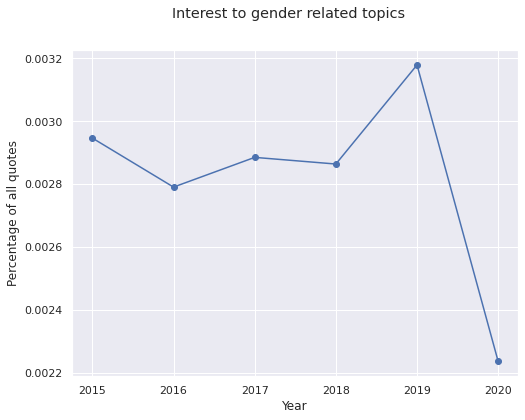

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(YEARS, data, "-o")
plt.xlabel("Year")
plt.ylabel("Percentage of all quotes")
plt.suptitle("Interest to gender related topics");

The 2020 year is only part data (as we have only access to half of the year), that is why we see this decrease in percentage. However, we can notice an overall increasing trends until 2019. 

### Quotes distribution 

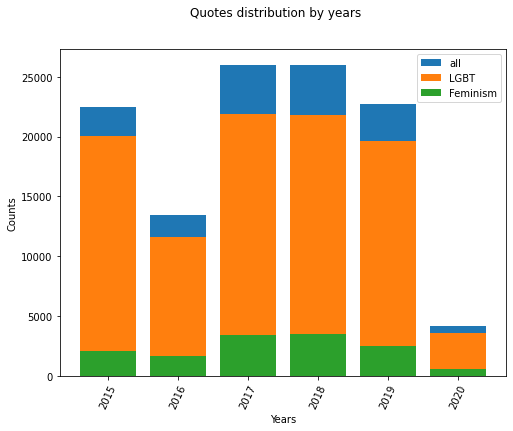

In [10]:
year_quotes = {year: (full_wiki.quote_year == year).sum() for year in YEARS} 
year_quotes_fem = {year: (data_fem.quote_year == year).sum() for year in YEARS} 
year_quotes_lgbt = {year: (data_lgbt.quote_year == year).sum() for year in YEARS} 
plt.figure(figsize=(8, 6))
plt.suptitle("Quotes distribution by years")
plt.xlabel("Years")
plt.ylabel("Counts")
plt.xticks(rotation=65)
plt.bar(year_quotes.keys(), year_quotes.values(), label="all")
plt.bar(year_quotes_lgbt.keys(), year_quotes_lgbt.values(), label="LGBT")
plt.bar(year_quotes_fem.keys(), year_quotes_fem.values(), label="Feminism")
plt.legend(loc="best")

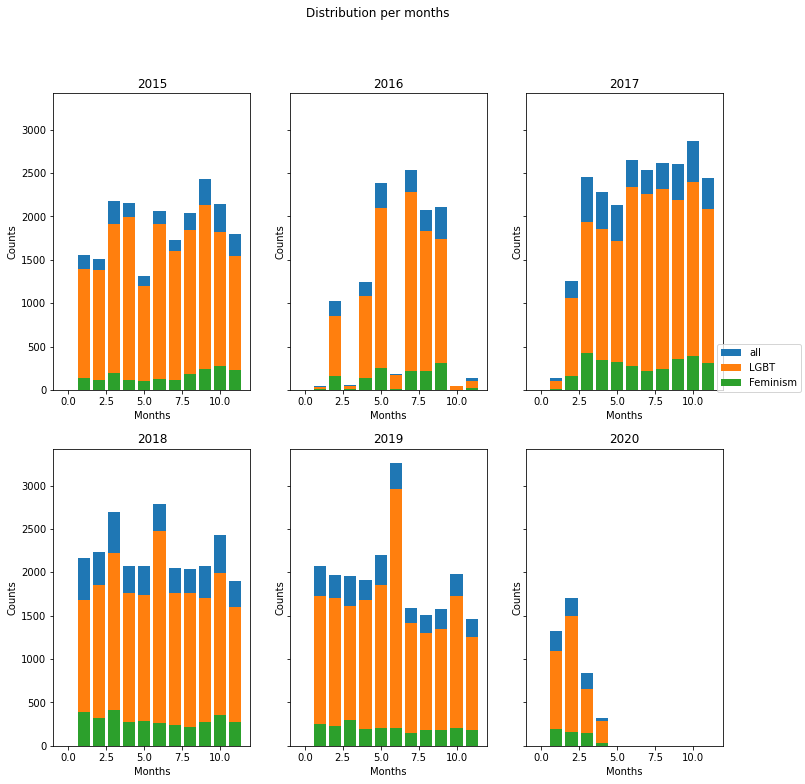

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12), sharey=True)
fig.suptitle(f"Distribution per months")

for idx, year in enumerate(YEARS):
  data = {month: ((full_wiki.quote_year == year) & (full_wiki.quote_month == month)).sum() for month in range(12)} 
  data_f = {month: ((data_fem.quote_year == year) & (data_fem.quote_month == month)).sum() for month in range(12)} 
  data_l = {month: ((data_lgbt.quote_year == year) & (data_lgbt.quote_month == month)).sum() for month in range(12)} 
  axs[idx // 3, idx % 3].set_xlabel("Months")
  axs[idx // 3, idx % 3].set_ylabel("Counts")
  axs[idx // 3, idx % 3].set_title(year)
  axs[idx // 3, idx % 3].bar(data.keys(), data.values(), label="all")
  axs[idx // 3, idx % 3].bar(data_l.keys(), data_l.values(), label="LGBT")
  axs[idx // 3, idx % 3].bar(data_f.keys(), data_f.values(), label="Feminism")
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.89, 0.5))

### Words frequency 

After that, we checked which words were the most frequent quotes containing keywords.

In [20]:
common_words = {elem: list(words.values())[clean_words[elem]] for elem in set(clean_words)}

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


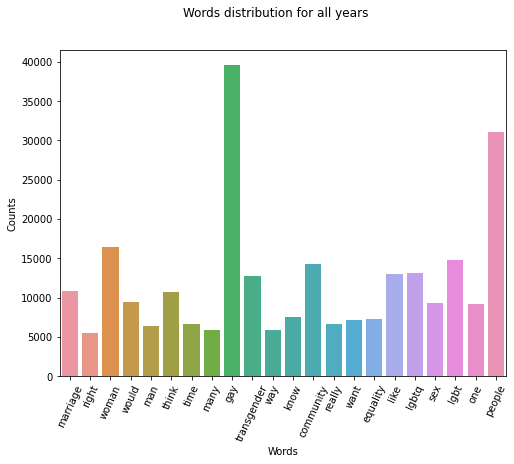

In [21]:
plt.figure(figsize=(8, 6))
plt.suptitle("Words distribution for all years")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=65)
sns.barplot(list(common_words.keys()), list(common_words.values()));

We plotted the distribution of the most frequent words by year.  

<ipython-input-22-567e892373b1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx // 3, idx % 3].set_xticklabels(data.keys(), rotation=65)
<ipython-input-22-567e892373b1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx // 3, idx % 3].set_xticklabels(data.keys(), rotation=65)
<ipython-input-22-567e892373b1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx // 3, idx % 3].set_xticklabels(data.keys(), rotation=65)
<ipython-input-22-567e892373b1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx // 3, idx % 3].set_xticklabels(data.keys(), rotation=65)
<ipython-input-22-567e892373b1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx // 3, idx % 3].set_xticklabels(data.keys(), rotation=65)
<ipython-input-22-567e892373b1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs

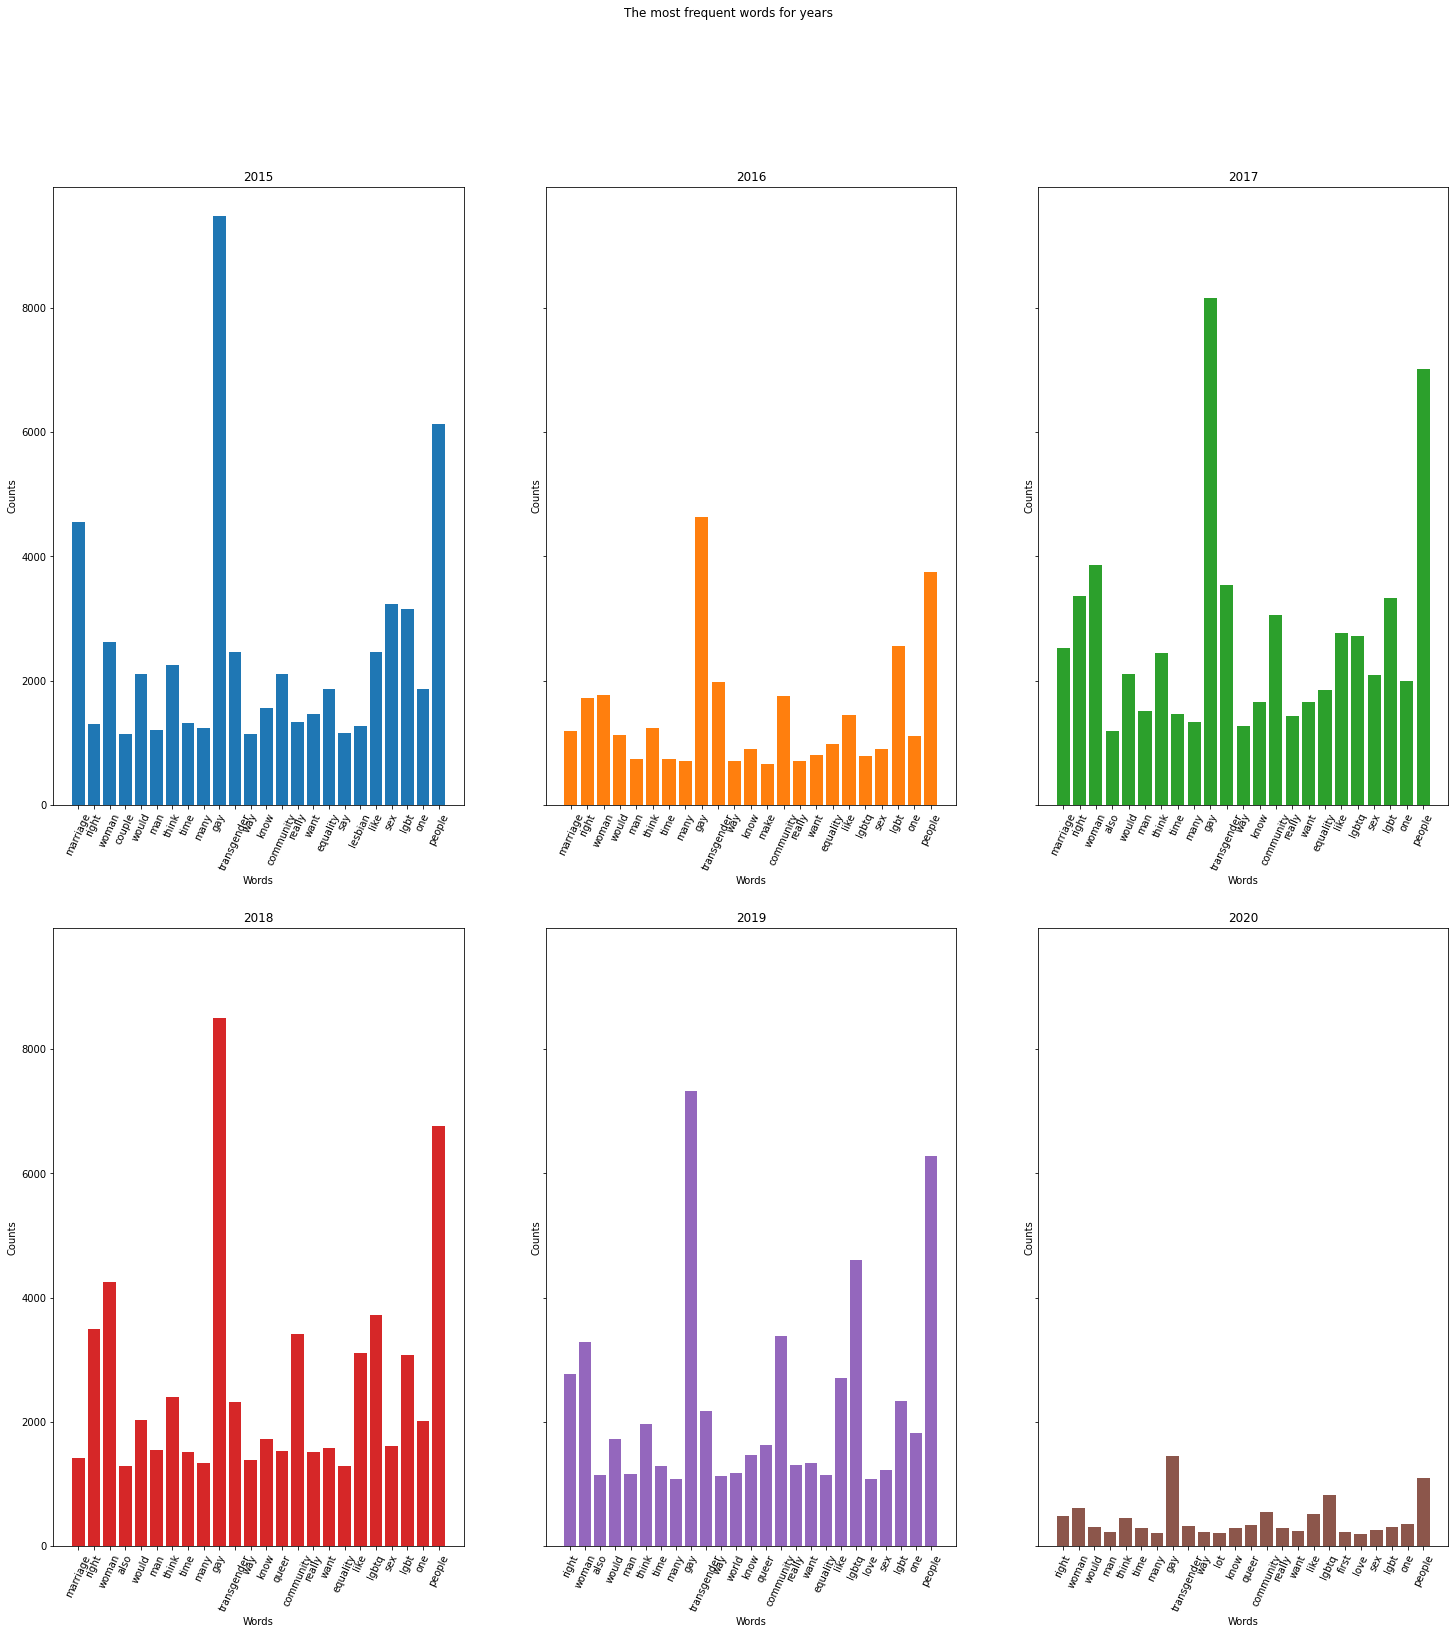

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), sharey=True)
fig.suptitle(f"The most frequent words for years")

for idx, year in enumerate(YEARS):
  data = preprocess_text(year)
  axs[idx // 3, idx % 3].set_xlabel("Words")
  axs[idx // 3, idx % 3].set_ylabel("Counts")
  axs[idx // 3, idx % 3].set_title(year)
  axs[idx // 3, idx % 3].set_xticklabels(data.keys(), rotation=65)
  axs[idx // 3, idx % 3].bar(data.keys(), data.values(), color=sns.color_palette()[year - 2015])

### Word cloud 

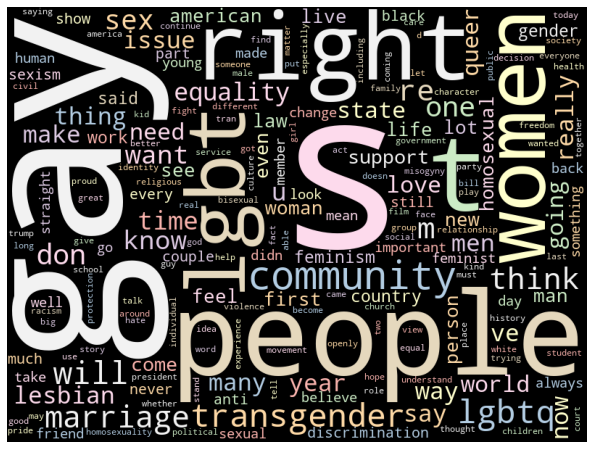

In [23]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=600, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(full_str)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off");

We can see that the 'gay' and 'lgbt' are among the most quoted words.

### Genders distribution

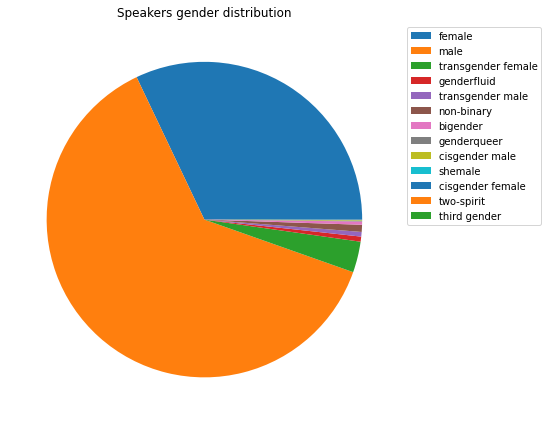

In [24]:
genders = dict(Counter([elem[0] if len(elem) == 1 else "bigender" for elem in full_wiki.gender.dropna()]))
plt.figure(figsize=(12, 6))
plt.title("Speakers gender distribution")
patches, texts = plt.pie(genders.values(), colors=sns.color_palette()[:len(genders)])
plt.legend(patches, genders.keys(), bbox_to_anchor=(1, 1))
plt.tight_layout();

We can see that the proportion of male is the highest, followed by the proportion of female and transgender female. It will be interesting to analyze the latter's quotes and see the difference in opinion.

### Nationalities distribution 🌍

In [25]:
nationalities = np.hstack(full_wiki.nationality.dropna().to_numpy())
nationalities[:5]

array(['United States of America', 'United States of America',
       'United States of America', 'United States of America',
       'United States of America'], dtype=object)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


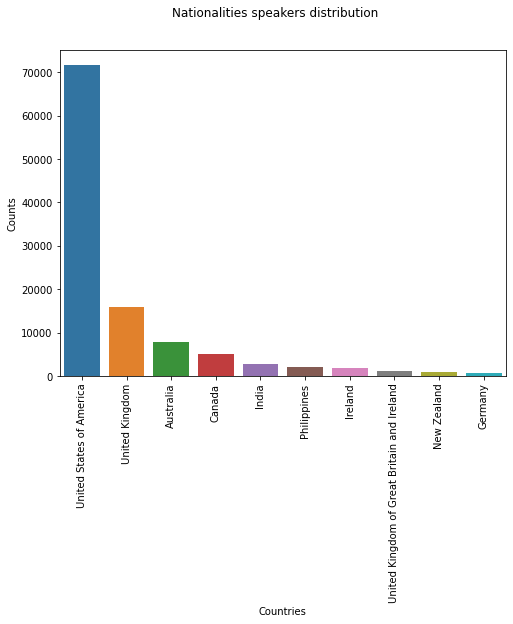

In [26]:
most_common = dict(Counter(nationalities).most_common(10))
plt.figure(figsize=(8, 6))
plt.suptitle("Nationalities speakers distribution")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=90)
sns.barplot(list(most_common.keys()), list(most_common.values()));

The USA dominates largely, whereas UK, Philipines and Australia are roughly of the same number of magnitudes (20 000 speakers). 

In [27]:
data_nats = dict(Counter(nationalities))
del data_nats[None]

In [28]:
data_nats_dict = {"CountryName": list(data_nats.keys()), "Counts": list(data_nats.values())}

In [29]:
df = pd.DataFrame.from_dict(data_nats_dict)

In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    """
    Converts to alpah2 country codes and continents
    params: col - country name 
    """
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    """
    Returns longitude and latitude data from country name
    params: country - name of country 
    """
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
df["codes"] = [geolocate(elem) for elem in df.CountryName]  # get coords
df.head()  # check data

,CountryName,Counts,codes,Latitude,Longitude
0,United Kingdom,21086,"(54.7023545, -3.2765753)",54.702354,-3.276575
1,United States of America,92088,"(39.7837304, -100.445882)",39.783730,-100.445882
2,Canada,7031,"(61.0666922, -107.991707)",61.066692,-107.991707
3,India,7335,"(22.3511148, 78.6677428)",22.351115,78.667743
4,France,996,"(46.603354, 1.8883335)",46.603354,1.888334


In [ ]:
df['Latitude'], df['Longitude'] = df.codes.str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df.dropna())):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        if not np.isnan(lat) and not np.isnan(long):
          radius = 5
          popup_text = """Country : {}<br>
                          Speakers : {}<br>"""
          popup_text = popup_text.format(df.iloc[i]['CountryName'],
                                    df.iloc[i]['Counts']
                                    )
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill=True).add_to(marker_cluster)
#show the map
world_map

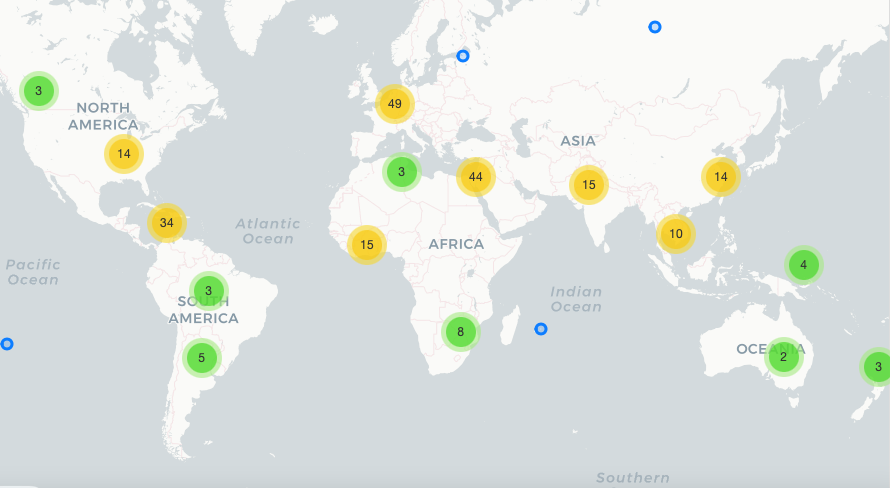

### Occupation

In [30]:
occupations = full_wiki.occupation.dropna().apply(lambda x: x[0]).to_numpy()
occupations[:5]

array(['LGBTIQ+ rights activist', 'LGBTIQ+ rights activist',
       'LGBTIQ+ rights activist', 'LGBTIQ+ rights activist',
       'LGBTIQ+ rights activist'], dtype=object)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


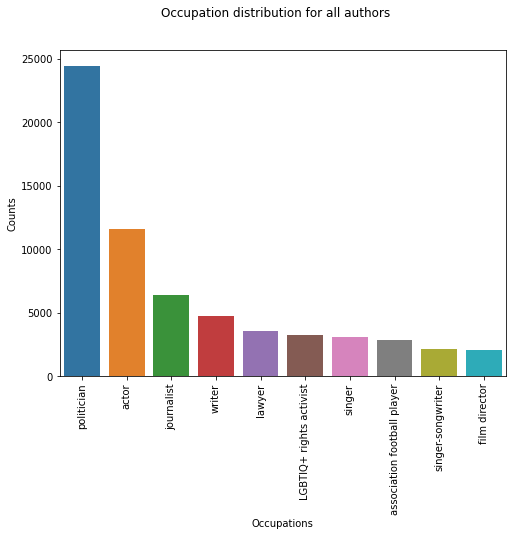

In [31]:
most_common = dict(Counter(occupations).most_common(10))

plt.figure(figsize=(8, 6))
plt.suptitle("Occupation distribution for all authors")
plt.xlabel("Occupations")
plt.ylabel("Counts")
plt.xticks(rotation=90)
sns.barplot(list(most_common.keys()), list(most_common.values()));

Politician is the most frequent occupation among speakers. 